In [1]:
import sys
sys.path.append('..')
from cmost_exposure import Exposure

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.ndimage as ndimage

font = {'size' : 14, 'family' : 'sans-serif'}
matplotlib.rc('font', **font)

data_dir = '../data'

In [2]:
# Load exposure from its filepath
ex = Exposure('{}/20210710/cmost003_002.fits'.format(data_dir),cleanup=False)

print(ex.get_info())

 Properties: 
		Readout mode: DEFAULT 
		Date: 0001-01-01T00:00:00 
		Exposure time: 64800000.0 ms
		LED voltage: -1.0 V 
		Temperature: -1.0 K
		Camera ID:  
		Detector ID: 
		Gain mode: 
		Number of frames: 1 frames
		
		


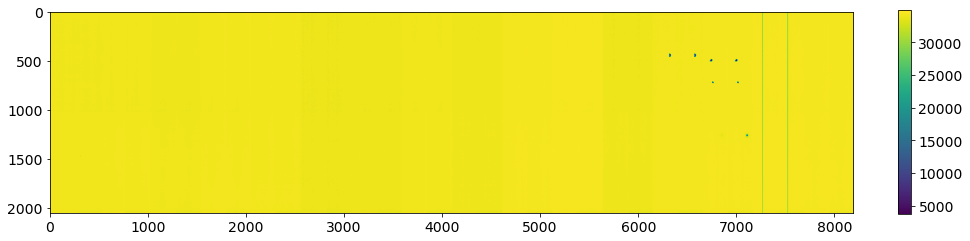

In [3]:
# Plot the raw image
plt.figure(figsize=[16,5])
plt.imshow(ex.raw_frames[0])
plt.colorbar(fraction=0.05, aspect=15, shrink=0.75)
plt.savefig('plots/20210713_raw_image.pdf')
plt.show()
plt.close()

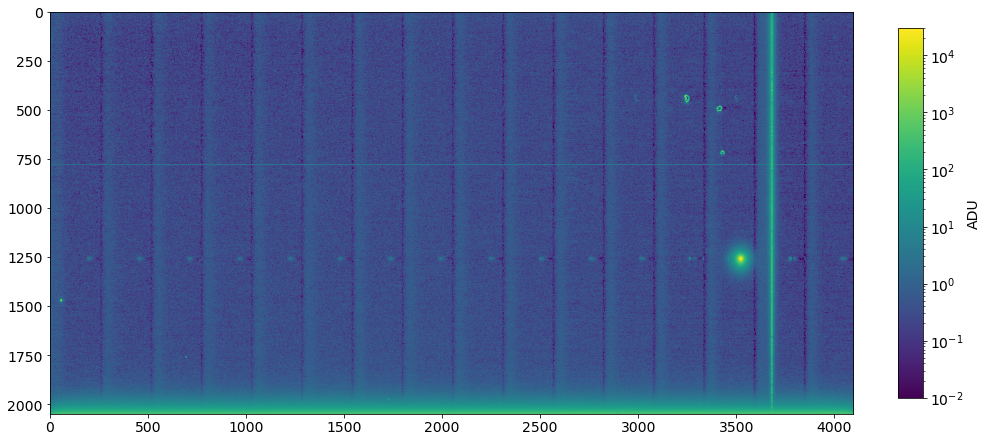

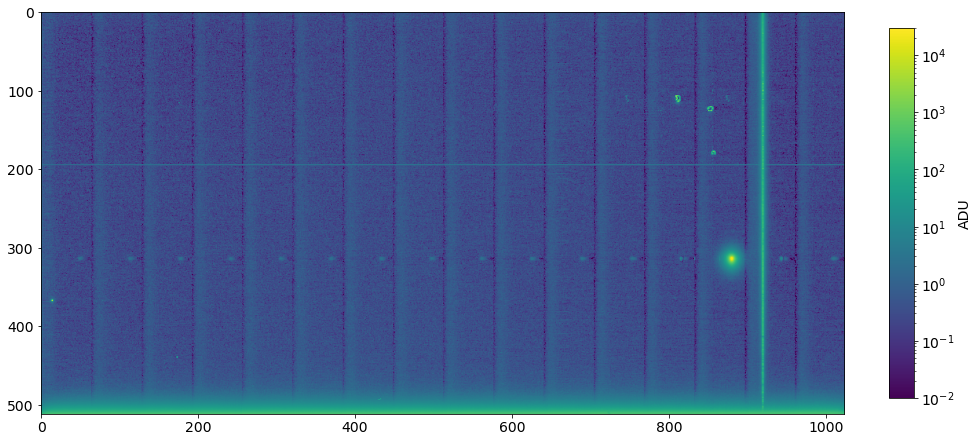

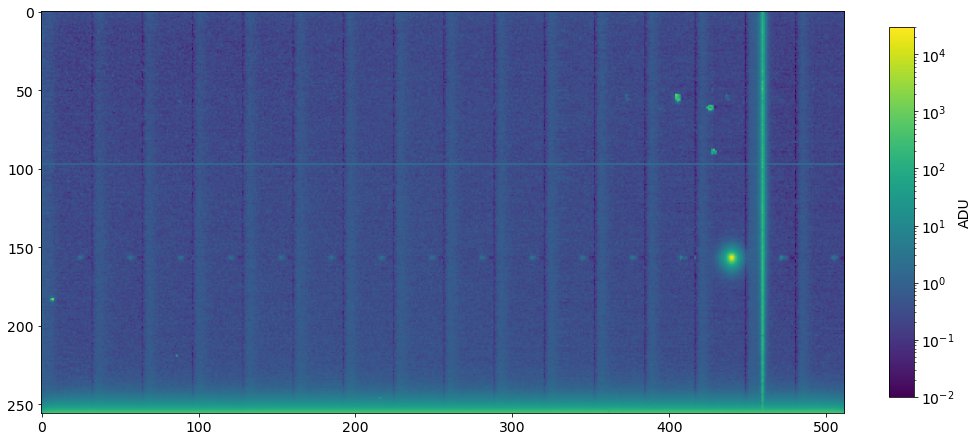

In [4]:
# Plot the CDS image
cds_frame1 = ex.cds_frames[0]
cds_frame1[cds_frame1 < 0.01] = 0.01
plt.figure(figsize=[16,8])
plt.imshow(cds_frame1, norm=LogNorm(vmin=0.01, vmax=30000))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='ADU')
plt.savefig('plots/20210713_cds_image.pdf')
plt.show()
plt.close()

binned_frames = ex.bin_frames() # Defaults to 4, pass bin_size=8 etc. to function for different bin amounts

plt.figure(figsize=[16,8])
plt.imshow(binned_frames[0], norm=LogNorm(vmin=0.01, vmax=30000))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='ADU')
plt.savefig('plots/20210713_cds_image_binned.pdf')
plt.show()
plt.close()

binned_frames2 = ex.bin_frames(bin_size=8)

plt.figure(figsize=[16,8])
plt.imshow(binned_frames2[0], norm=LogNorm(vmin=0.01, vmax=30000))
plt.colorbar(fraction=0.05, aspect=15, shrink=0.85, label='ADU')
plt.savefig('plots/20210713_cds_image_binned2.pdf')
plt.show()
plt.close()